### ML Part 0: Introduction to Image analysis and Pytorch

In our machine learning assignment, we will be building a model that analyzes image data. We will familiarize ourselves with this data type in this jupyter notebook. 

In [1]:
## Importing packages 
import torch
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
import torchvision

#### Importing images and applying a transformation:

In [2]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
#specifying image transformation(s) - we are converting the image to a tensor which can be used by tensorflow
transform = transforms.Compose([transforms.ToTensor()])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
           )


#### Using python indexing, "look" at one of the images. What does is outputted? How is your image stored in all_images?

Looking at one of the images, it just prints a letter. In all_images, the image is stored as a matrix of numbers. 

In [11]:
images[1]
all_images[1][0]

tensor([[[0.3412, 0.3216, 0.3137,  ..., 0.3725, 0.3686, 0.3765],
         [0.3176, 0.3137, 0.3137,  ..., 0.3765, 0.3725, 0.3804],
         [0.2980, 0.2980, 0.3020,  ..., 0.3686, 0.3686, 0.3725],
         ...,
         [0.3294, 0.3176, 0.3294,  ..., 0.3569, 0.3412, 0.3373],
         [0.3176, 0.3216, 0.3529,  ..., 0.3765, 0.3686, 0.3647],
         [0.3216, 0.3255, 0.3569,  ..., 0.3765, 0.3765, 0.3804]],

        [[0.3725, 0.3529, 0.3451,  ..., 0.4118, 0.4157, 0.4235],
         [0.3490, 0.3451, 0.3451,  ..., 0.4157, 0.4196, 0.4275],
         [0.3294, 0.3294, 0.3333,  ..., 0.4157, 0.4157, 0.4196],
         ...,
         [0.3843, 0.3725, 0.3765,  ..., 0.3961, 0.3804, 0.3765],
         [0.3725, 0.3765, 0.4000,  ..., 0.4157, 0.4078, 0.4039],
         [0.3765, 0.3804, 0.4039,  ..., 0.4157, 0.4157, 0.4196]],

        [[0.4471, 0.4275, 0.4196,  ..., 0.4588, 0.4627, 0.4706],
         [0.4235, 0.4196, 0.4196,  ..., 0.4627, 0.4667, 0.4745],
         [0.4039, 0.4039, 0.4078,  ..., 0.4627, 0.4627, 0.

#### Using python indexing, what size is the image?

In [13]:
all_images[1][0].numpy().shape

(3, 324, 1550)

#### Look through the dataset, are all of the pictures the same size?

In [15]:
print(all_images[1][0].numpy().shape)
print(all_images[2][0].numpy().shape)
print(all_images[3][0].numpy().shape)
print(all_images[4][0].numpy().shape)

(3, 324, 1550)
(3, 127, 389)
(3, 704, 2168)
(3, 584, 2073)


*Your notes here on the size of the images in the dataset*

#### Using matplotlib, "look" at the same image. How is this similar/different from our python indexing approach?

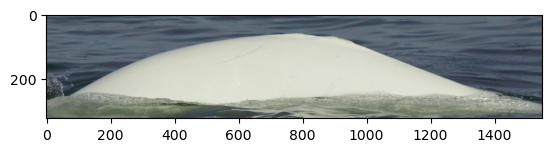

In [14]:
plt.imshow(all_images[1][0].permute(1,2,0).numpy())

*Your notes here on looking at the image with matplotlib*

#### Apply a new transformation to the data that changes the color of the image - check out options here: https://docs.pytorch.org/vision/0.11/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [18]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor(), transforms.ColorJitter(brightness=.5, hue=.3)])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

Dataset ImageFolder
    Number of datapoints: 9492
    Root location: /projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all
    StandardTransform
Transform: Compose(
               ToTensor()
               ColorJitter(brightness=(0.5, 1.5), contrast=None, saturation=None, hue=(-0.3, 0.3))
           )


#### View the same image from above with BOTH python indexing and matplotlib

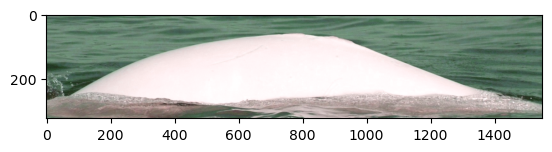

In [19]:
plt.imshow(all_images[1][0].permute(1,2,0).numpy())

In [20]:
all_images[1][0]

tensor([[[0.2416, 0.2310, 0.2268,  ..., 0.2480, 0.2501, 0.2543],
         [0.2289, 0.2268, 0.2268,  ..., 0.2501, 0.2522, 0.2565],
         [0.2183, 0.2183, 0.2204,  ..., 0.2501, 0.2501, 0.2522],
         ...,
         [0.2353, 0.2289, 0.2289,  ..., 0.2353, 0.2310, 0.2289],
         [0.2289, 0.2310, 0.2416,  ..., 0.2459, 0.2459, 0.2437],
         [0.2310, 0.2331, 0.2437,  ..., 0.2459, 0.2501, 0.2522]],

        [[0.1844, 0.1738, 0.1696,  ..., 0.2014, 0.1992, 0.2035],
         [0.1717, 0.1696, 0.1696,  ..., 0.2035, 0.2014, 0.2056],
         [0.1611, 0.1611, 0.1632,  ..., 0.1992, 0.1992, 0.2014],
         ...,
         [0.1780, 0.1717, 0.1780,  ..., 0.1929, 0.1844, 0.1823],
         [0.1717, 0.1738, 0.1908,  ..., 0.2035, 0.1992, 0.1971],
         [0.1738, 0.1759, 0.1929,  ..., 0.2035, 0.2035, 0.2056]],

        [[0.2222, 0.2116, 0.2074,  ..., 0.2395, 0.2432, 0.2474],
         [0.2095, 0.2074, 0.2074,  ..., 0.2417, 0.2453, 0.2496],
         [0.1989, 0.1989, 0.2010,  ..., 0.2432, 0.2432, 0.

#### Describe how your image changed with the transformation. Did the values change? Did the tensor/image size change? How does the image look?

*Describe how your image changed with the transformation*

#### Apply a transformation to the data that crops the image - check out options here: https://docs.pytorch.org/vision/0.11/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [ ]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor()])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)

#### View the same image from above with BOTH python indexing and matplotlib

#### Describe how your image changed with the transformation. Did the values change? Did the tensor/image size change? How does the image look?

*Describe how your image changed with the transformation*

#### Look through the dataset, are all of the pictures the same size?

*Describe whether the image sizes are now the same*

#### Determine an image transformation approach that would give you optimal input images for a machine learning whale species classifier

You want: 
- All images converted to numerics
- All images to be the same size
- A data normalization approach
- Data augmentation

Make sure you visualize a few images to make sure your chosen approach was successful!

In [ ]:
#specifying image file path
images = "/projects/bgmp/shared/Bi625/ML_Assignment/Datasets/Whale_species/species_all"
##### ADD YOUR TRANSFORMATION HERE #####
transform = transforms.Compose([transforms.ToTensor()])
#loading in images and applying transformation
all_images = datasets.ImageFolder(images, transform)
print(all_images)